<a href="https://colab.research.google.com/github/UjjwalRana12/ufc50-videos-dataset/blob/main/capitall_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset_zip = "/content/drive/MyDrive/assests/archive (17).zip"

In [ ]:
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("/content/")


dataset_path = "/content/UCF50"
print("Extracted files:", os.listdir(dataset_path))

In [ ]:
categories = sorted(os.listdir(dataset_path))
print(f"Total action classes: {len(categories)}")
print("Action Categories:", categories)

#Calculating on 15 frames to save the computational cost

In [ ]:
import cv2
import os

video_dir = "/content/UCF50"
output_dir = "/content/UCF50_frames"
os.makedirs(output_dir, exist_ok=True)

frame_interval = 15


for category in sorted(os.listdir(video_dir)):
    category_path = os.path.join(video_dir, category)
    if not os.path.isdir(category_path):
        continue


    category_output_path = os.path.join(output_dir, category)
    os.makedirs(category_output_path, exist_ok=True)


    for video_file in os.listdir(category_path):
        video_path = os.path.join(category_path, video_file)
        cap = cv2.VideoCapture(video_path)

        frame_count = 0
        success, frame = cap.read()
        while success:
            if frame_count % frame_interval == 0:
                frame_filename = f"{video_file}_frame{frame_count}.jpg"
                frame_filepath = os.path.join(category_output_path, frame_filename)
                cv2.imwrite(frame_filepath, frame)

            frame_count += 1
            success, frame = cap.read()

        cap.release()

print("✅ Frame extraction completed!")


#STEP-2

#Create a datset of 15 frames so that , direct accessment can be done

In [ ]:
import shutil

shutil.make_archive("/content/UCF50_frames", 'zip', "/content/UCF50_frames")


In [ ]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image


In [ ]:
class UCF50Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.classes = sorted(os.listdir(root_dir))


        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.data.append((img_path, class_idx))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
from PIL import Image
import torch
from torchvision import transforms


image = Image.open("/content/UCF50_frames/BaseballPitch/v_BaseballPitch_g01_c01.avi_frame0.jpg")

transform = transforms.ToTensor()
tensor_image = transform(image)

print("Original Image Size (PIL):", image.size)  # (W, H)
print("Tensor Shape:", tensor_image.shape)  # (C, H, W)
print("Pixel Range:", tensor_image.min().item(), "to", tensor_image.max().item())


In [ ]:
batch_size = 32

dataset = UCF50Dataset(root_dir="/content/UCF50_frames", transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)


for images, labels in dataloader:
    print("Batch Image Shape:", images.shape)  # (batch_size, 3, 224, 224)
    print("Batch Labels:", labels)
    break


In [ ]:
dataset_zip="/content/drive/MyDrive/Colab Notebooks/UCF50_frames.zip"

In [ ]:
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("/content/UCF50_per_15frames.zip")


dataset_path = "/content/UCF50_per_15frames.zip"
print("Extracted files:", os.listdir(dataset_path))

Extracted files: ['RockClimbingIndoor', 'Nunchucks', 'UCF50', 'HorseRiding', 'Kayaking', 'HorseRace', 'TrampolineJumping', 'PullUps', 'BreastStroke', 'PoleVault', 'Rowing', 'Drumming', 'TennisSwing', 'MilitaryParade', 'RopeClimbing', 'Billiards', 'Biking', 'JumpRope', 'VolleyballSpiking', 'Fencing', 'Swing', 'BenchPress', 'Diving', 'PlayingPiano', 'JugglingBalls', 'Punch', 'PizzaTossing', 'PommelHorse', 'CleanAndJerk', 'PlayingGuitar', 'JumpingJack', 'GolfSwing', 'SoccerJuggling', 'JavelinThrow', 'Skiing', 'Mixing', 'PushUps', 'HighJump', 'Lunges', 'SalsaSpin', 'WalkingWithDog', 'TaiChi', 'BaseballPitch', 'Basketball', 'HulaHoop', 'PlayingTabla', 'SkateBoarding', 'ThrowDiscus', 'Skijet', 'YoYo', 'PlayingViolin']


In [ ]:
dataset_path = "/content/UCF50_per_15frames.zip"
print("Extracted files:", os.listdir(dataset_path))

Extracted files: ['RockClimbingIndoor', 'Nunchucks', 'UCF50', 'HorseRiding', 'Kayaking', 'HorseRace', 'TrampolineJumping', 'PullUps', 'BreastStroke', 'PoleVault', 'Rowing', 'Drumming', 'TennisSwing', 'MilitaryParade', 'RopeClimbing', 'Billiards', 'Biking', 'JumpRope', 'VolleyballSpiking', 'Fencing', 'Swing', 'BenchPress', 'Diving', 'PlayingPiano', 'JugglingBalls', 'Punch', 'PizzaTossing', 'PommelHorse', 'CleanAndJerk', 'PlayingGuitar', 'JumpingJack', 'GolfSwing', 'SoccerJuggling', 'JavelinThrow', 'Skiing', 'Mixing', 'PushUps', 'HighJump', 'Lunges', 'SalsaSpin', 'WalkingWithDog', 'TaiChi', 'BaseballPitch', 'Basketball', 'HulaHoop', 'PlayingTabla', 'SkateBoarding', 'ThrowDiscus', 'Skijet', 'YoYo', 'PlayingViolin']


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


dataset_path = "/content/UCF50_per_15frames.zip"
batch_size = 16
img_size = (128, 128)


train_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)


class_names = train_data.class_names
print(f"Classes: {class_names}")

# # Count the Number of images in each class but to computational to run so i commented it

# class_counts = {class_name: 0 for class_name in class_names}

# for images, labels in train_data:
#     for label in labels.numpy():
#         class_counts[class_names[label]] += 1

# # Plot class distribution
# plt.figure(figsize=(12, 5))
# plt.bar(class_counts.keys(), class_counts.values())
# plt.xticks(rotation=90)
# plt.xlabel("Classes")
# plt.ylabel("Number of Images")
# plt.title("Class Distribution")
# plt.show()

## Normalisation
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))


val_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))


for images, labels in train_data.take(1):
    print(f"Image Batch Shape: {images.shape}, Label Batch Shape: {labels.shape}")

Found 268604 files belonging to 51 classes.
Using 214884 files for training.
Classes: ['BaseballPitch', 'Basketball', 'BenchPress', 'Biking', 'Billiards', 'BreastStroke', 'CleanAndJerk', 'Diving', 'Drumming', 'Fencing', 'GolfSwing', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'JavelinThrow', 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Lunges', 'MilitaryParade', 'Mixing', 'Nunchucks', 'PizzaTossing', 'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch', 'PushUps', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'SkateBoarding', 'Skiing', 'Skijet', 'SoccerJuggling', 'Swing', 'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping', 'UCF50', 'VolleyballSpiking', 'WalkingWithDog', 'YoYo']
Found 268604 files belonging to 51 classes.
Using 53720 files for validation.
Image Batch Shape: (16, 128, 128, 3), Label Batch Shape: (16,)


In [ ]:
for images, labels in train_data.take(1):
    print(images.shape)

(16, 128, 128, 3)


In [ ]:
num_batches = len(train_data)
print(f"Total batches in training data: {num_batches}")


Total batches in training data: 13431


In [ ]:

# # Check dimensions
# for images, labels in train_data:
#     print(f"Image Batch Shape: {images.shape}, Label Batch Shape: {labels.shape}")

# CONVOLSTM working

In [ ]:
import numpy as np

In [ ]:
# import numpy as np
# import tensorflow as tf

# SEQUENCE_LENGTH = 10

# def create_sequences(dataset):
#
#     all_images, all_labels = [], []

#     for images, labels in dataset:
#         all_images.extend(images.numpy())
#         all_labels.extend(labels.numpy())

#     sequences, seq_labels = [], []
#     for i in range(len(all_images) - SEQUENCE_LENGTH):
#         sequences.append(np.array(all_images[i:i+SEQUENCE_LENGTH]))
#         seq_labels.append(all_labels[i+SEQUENCE_LENGTH])

#     return np.array(sequences), np.array(seq_labels)


# X_train, y_train = create_sequences(train_data)
# X_val, y_val = create_sequences(val_data)

# print(f"Train Sequences: {X_train.shape}, Validation Sequences: {X_val.shape}")


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import ConvLSTM2D, MaxPooling3D, Dropout, Flatten, Dense
# from tensorflow.keras.callbacks import EarlyStopping

# def create_convlstm_model():
#     model = Sequential()

#     # First ConvLSTM Layer
#     model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3), activation='tanh',
#                          recurrent_dropout=0.2, return_sequences=True,
#                          input_shape=(SEQUENCE_LENGTH, img_size[0], img_size[1], 3)))

#     model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same'))
#     model.add(Dropout(0.2))

#     # Second ConvLSTM Layer
#     model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='tanh',
#                          recurrent_dropout=0.2, return_sequences=True))

#     model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same'))
#     model.add(Dropout(0.2))


#     model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='tanh',
#                          recurrent_dropout=0.2, return_sequences=False))

#     model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same'))

#     model.add(Flatten())
#     model.add(Dense(128, activation="relu"))
#     model.add(Dropout(0.3))
#     model.add(Dense(len(class_names), activation="softmax"))  # Ensure class_names is defined


#     model.compile(loss="sparse_categorical_crossentropy",  # Use "categorical_crossentropy" if one-hot encoding
#                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#                   metrics=["accuracy"])

#     return model

# model = create_convlstm_model()
# model.summary()





In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# history = model.fit(X_train, y_train,
#                     validation_data=(X_val, y_val),
#                     epochs=50,
#                     batch_size=batch_size,
#                     callbacks=[early_stopping])

#CONVOLSTM doesn't work because of the less gpu power

# Using CONVO2D

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

def create_efficient_model(num_classes):
    model = Sequential()

    # fst layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal", input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    #2nd layer
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    #3rd layer
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # 4 layer
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Global Average Pooling - to reduce some param because it also has high computtational cost
    model.add(GlobalAveragePooling2D())

    # Fully connected layer
    model.add(Dense(256, activation='relu', kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))


    model.add(Dense(num_classes, activation='softmax'))


    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"]
    )

    return model


In [ ]:
for images, labels in train_data.take(1):
    print(images.shape)


(16, 128, 128, 3)


In [ ]:
num_classes = len(class_names)
model = create_efficient_model(num_classes)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 51)                  │          13,107 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,259 (1.79 MB)

 Trainable params: 468,787 (1.79 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
num_classes = len(class_names)
model = create_efficient_model(num_classes)
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 51)                  │          13,107 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,259 (1.79 MB)

 Trainable params: 468,787 (1.79 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:

epochs = 5
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)



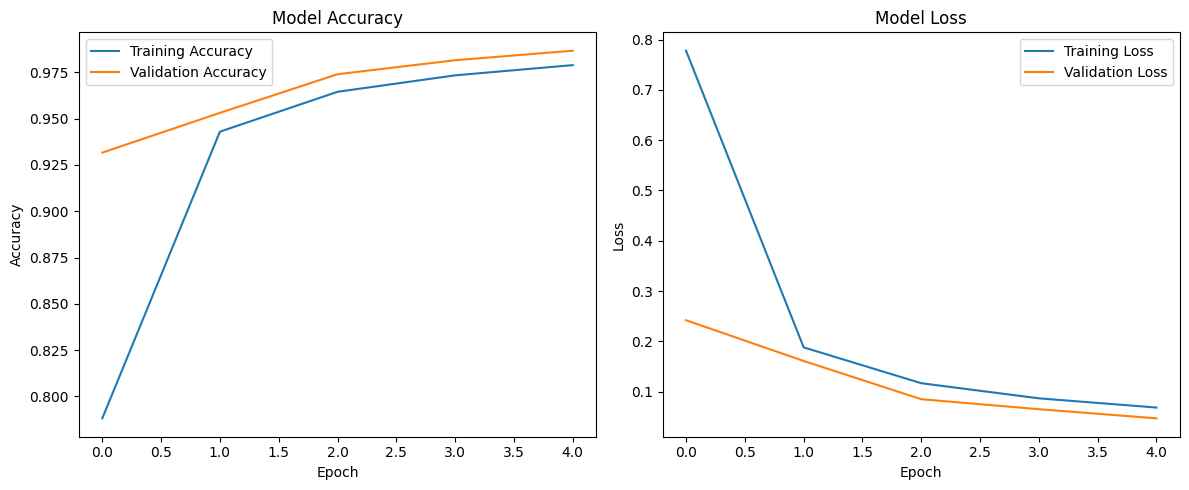

3358/3358 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - accuracy: 0.9913 - loss: 0.0335
Validation Accuracy: 0.9919
Validation Loss: 0.0302


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")




In [ ]:
model.save('ufc_classifier_model.h5')
print("Model saved as 'ufc_classifier_model.h5'")

Model saved as 'ufc_classifier_model.h5'


In [1]:
import tensorflow as tf


model = tf.keras.models.load_model("/content/ufc_classifier_model.h5")


In [2]:
classes = ['BaseballPitch', 'Basketball', 'BenchPress', 'Biking', 'Billiards',
           'BreastStroke', 'CleanAndJerk', 'Diving', 'Drumming', 'Fencing',
           'GolfSwing', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop',
           'JavelinThrow', 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking',
           'Lunges', 'MilitaryParade', 'Mixing', 'Nunchucks', 'PizzaTossing',
           'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PoleVault',
           'PommelHorse', 'PullUps', 'Punch', 'PushUps', 'RockClimbingIndoor', 'RopeClimbing',
           'Rowing', 'SalsaSpin', 'SkateBoarding', 'Skiing', 'Skijet',
           'SoccerJuggling', 'Swing', 'TaiChi', 'TennisSwing', 'ThrowDiscus',
           'TrampolineJumping', 'UCF50', 'VolleyballSpiking', 'WalkingWithDog', 'YoYo']


In [3]:
class_mapping = {i: cls for i, cls in enumerate(classes)}

def get_class_name(predicted_label):
    return class_mapping.get(predicted_label, "Unknown")





In [6]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

def extract_frame(video_path, frame_num=0):

    cap = cv2.VideoCapture(video_path)


    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

    success, frame = cap.read()
    cap.release()

    if success:
        return frame
    else:
        print("Error: Could not extract frame")
        return None

def preprocess_frame(frame):

    frame = cv2.resize(frame, (128, 128))
    frame = image.img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame / 255.0
    return frame

def predict_video(video_path):

    frame = extract_frame(video_path)

    if frame is not None:
        processed_frame = preprocess_frame(frame)


        predictions = model.predict(processed_frame)
        predicted_class = np.argmax(predictions)


        class_name = classes[predicted_class]
        return class_name
    else:
        return "Error: No frame extracted"


video_path = "/content/v_BaseballPitch_g01_c01.avi"
predicted_class = predict_video(video_path)
print("Predicted Activity:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Activity: BaseballPitch


#This code  work for image , like just give the image and it will predict the class

In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing import image


# img_path = "/content/UCF50_per_15frames.zip/Diving/v_Diving_g01_c01.avi_frame0.jpg"
# img = image.load_img(img_path, target_size=(128, 128))

# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array = img_array / 255.0


In [ ]:
# model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 51)                  │          13,107 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,261 (1.79 MB)

 Trainable params: 468,787 (1.79 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:

# predictions = model.predict(img_array)


# predicted_class = np.argmax(predictions, axis=1)[0]


# print(f"Predicted Class Index: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class Index: 7


In [ ]:
# classes = ['BaseballPitch', 'Basketball', 'BenchPress', 'Biking', 'Billiards',
#            'BreastStroke', 'CleanAndJerk', 'Diving', 'Drumming', 'Fencing',
#            'GolfSwing', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop',
#            'JavelinThrow', 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking',
#            'Lunges', 'MilitaryParade', 'Mixing', 'Nunchucks', 'PizzaTossing',
#            'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PoleVault',
#            'PommelHorse', 'PullUps', 'Punch', 'PushUps', 'RockClimbingIndoor', 'RopeClimbing',
#            'Rowing', 'SalsaSpin', 'SkateBoarding', 'Skiing', 'Skijet',
#            'SoccerJuggling', 'Swing', 'TaiChi', 'TennisSwing', 'ThrowDiscus',
#            'TrampolineJumping', 'UCF50', 'VolleyballSpiking', 'WalkingWithDog', 'YoYo']


In [ ]:
# class_mapping = {i: cls for i, cls in enumerate(classes)}

# def get_class_name(predicted_label):
#     return class_mapping.get(predicted_label, "Unknown")


# print(get_class_name(predicted_class))
# #